# Exploratory Data Analysis

In [23]:
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("../data/processed/online_shoppers_intention_06_clean.csv")

In [3]:
df.head()

,admin,admin_duration,info,info_duration,prod_related,prod_related_duration,bounce_rate,exit_rate,page_value,special_day,month,os,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [25]:
df["month"].value_counts()

month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

## Univariate Analysis

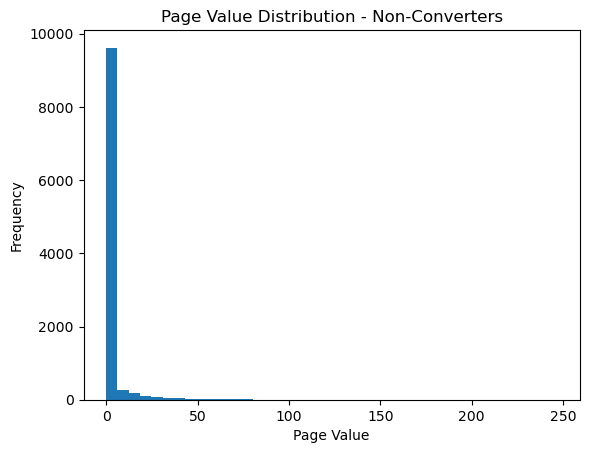

In [31]:
import matplotlib.pyplot as plt

pv_false = df.loc[df["revenue"] == False, "page_value"]

plt.figure()
plt.hist(pv_false, bins=40)
plt.xlabel("Page Value")
plt.ylabel("Frequency")
plt.title("Page Value Distribution - Non-Converters")
plt.show()

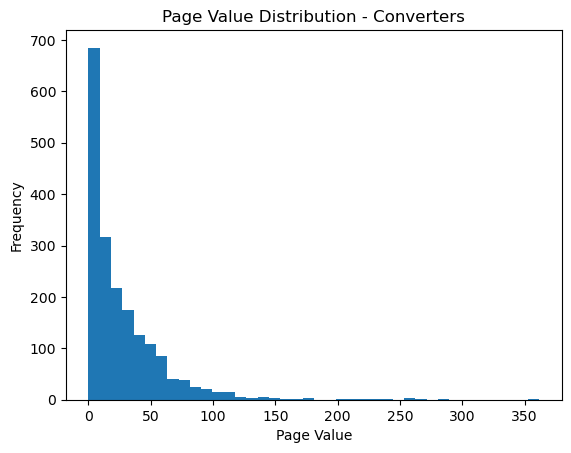

In [32]:
pv_true = df.loc[df["revenue"] == True, "page_value"]

plt.figure()
plt.hist(pv_true, bins=40)
plt.xlabel("Page Value")
plt.ylabel("Frequency")
plt.title("Page Value Distribution - Converters")
plt.show()

### 1. Target Distribution

In [4]:
# create labels
df["Revenue_Label"] = df["revenue"].map({
    True: "Converted",
    False: "Not Converted"
})

revenue_percent = (
    df["Revenue_Label"]
    .value_counts(normalize=True)
    .mul(100)
    .reset_index()
)

revenue_percent.columns = ["Purchase Outcome", "Percentage"]

# create plot using the new column
fig = px.bar(
    revenue_percent,
    x="Purchase Outcome",
    y="Percentage",
    color="Purchase Outcome",
    text="Percentage",
    title="Conversion Rate Distribution",
    color_discrete_map={
        "Not Converted": "#2E3192",   #  Blue
        "Converted": "#F4B400"        #  Gold
    },
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')

fig.update_layout(
    yaxis_title="Percentage of Sessions (%)",
    xaxis_title="Purchase Outcome",
    showlegend=False,
    yaxis=dict(range=[0, 100])
)

fig.show()


- Only ~15% of sessions result in revenue.

- This means predicting purchase is difficult but valuable for achieving a higher conversion rate.

## Bivariate Analysis

### 2. Page Values vs Revenue

In [5]:
# Horizontal boxplot
fig = px.box(
    df,
    y="Revenue_Label",          # categorical on Y
    x="page_value",             # numeric on X
    color="Revenue_Label",
    title="Page Value Distribution by Purchase Outcome",
    color_discrete_map={
        "Not Converted": "#2E3192",   #  Blue
        "Converted": "#F4B400"        #  Gold
    },
    labels={
        "Revenue_Label": "  ",
        "page_value": "Page Value"
    },
    points=False
)

# Show mean marker
fig.update_traces(boxmean=True)

# Calculate medians
medians = df.groupby("Revenue_Label")["page_value"].median()

# Add median annotations (swap x and y!)
for group in medians.index:
    fig.add_annotation(
        y=group,
        x=medians[group],
        text=f"Median: {medians[group]:.2f}",
        showarrow=True,
        arrowhead=2,
        xshift=10
    )

fig.update_layout(showlegend=False)

fig.show()



- Not Converted → Median ≈ 0
- Converted → Median ≈ 16.76

- This shows that the most non-buyers sessions have almost zero page value while buyers have significantly higher page values.

- Also, non-converted sessions are concentrated around 0 vs converted, which has a wider distribution.

- High page values for non-converted sessions may reflect intent even if the purchase did not occur. This segment is particularly valuable for real-time intervention strategies such as **urgency triggers, limited-time discounts, or personalized offers**.

### 3. Bounce Rate vs Revenue

In [6]:
BLUE = "#2E3192"
GOLD = "#F4B400"

fig_bounce = px.box(
    df,
    y="Revenue_Label",
    x="bounce_rate",
    color="Revenue_Label",
    title="Bounce Rate Distribution by Purchase Outcome",
    labels={
        "Revenue_Label": " ",
        "bounce_rate": "Bounce Rate"
    },
    color_discrete_map={
        "Not Converted": BLUE,
        "Converted": GOLD
    },
    points=False
)

fig_bounce.update_traces(boxmean=True)

# Calculate medians
medians_bounce = df.groupby("Revenue_Label")["bounce_rate"].median()

# Add median annotations
for group in medians_bounce.index:
    fig_bounce.add_annotation(
        y=group,
        x=medians_bounce[group],
        text=f"Median: {medians_bounce[group]:.3f}",
        showarrow=True,
        arrowhead=2,
        xshift=10
    )

fig_bounce.update_layout(showlegend=False)

fig_bounce.show()

- Maximum values of bounce rates are the same (0.2) for both buyers and non-buyers.
- The median values are also not very different, so the bounce rate might not be a stand alone factor for the prediction of revenue / conversions.

### 4. Exit Rate vs Revenue

In [7]:
fig_exit = px.box(
    df,
    y="Revenue_Label",
    x="exit_rate",
    color="Revenue_Label",
    title="Exit Rate Distribution by Purchase Outcome",
    labels={
        "Revenue_Label": "Purchase Outcome",
        "exit_rate": "Exit Rate"
    },
    color_discrete_map={
        "Not Converted": BLUE,
        "Converted": GOLD
    },
    points=False
)

fig_exit.update_traces(boxmean=True)

# Calculate medians
medians_exit = df.groupby("Revenue_Label")["exit_rate"].median()

# Add median annotations
for group in medians_exit.index:
    fig_exit.add_annotation(
        y=group,
        x=medians_exit[group],
        text=f"Median: {medians_exit[group]:.3f}",
        showarrow=True,
        arrowhead=2,
        xshift=10
    )

fig_exit.update_layout(showlegend=False)

fig_exit.show()

- Not Converted → Median ≈ 0.029
- Converted → Median ≈ 0.016

- The exit rate median for non-converted customers is almost twice as that of the customers that made a purchase.

- So, it is safe to say that **exit rate helps predict the target values more than bounce rate**.

### 5. Product page vs Revenue

In [8]:
# Create plot
fig = px.violin(
    df,
    y="Revenue_Label",
    x="prod_related",
    color="Revenue_Label",
    box=True,
    points=False,
    color_discrete_map={
        "Not Converted": "#2E3192",
        "Converted": "#F4B400"
    },
    title="Product Pages Visited by Purchase Outcome"
)

# Calculate medians
medians = df.groupby("Revenue_Label")["prod_related"].median()

# Add median annotations
for group in medians.index:
    fig.add_annotation(
        y=group,
        x=medians[group],
        text=f"Median: {medians[group]:.1f}",
        showarrow=True,
        arrowhead=2,
        xshift=10
    )

fig.update_layout(showlegend=False)

fig.show()

- Not Converted → Median ≈ 16 pages
- Converted → Median ≈ 29 pages

- The median for conversions is almost double than the non-buyers, this shows that the strong engagement difference is an importnat factor for the conversion.
- Also, the maximum value of pages for not converted category is higher than the converted. This could be casual browsers, escpecially those without any purchase intent. 

### 6. Product page duration vs Revenue

In [9]:
fig = px.violin(
    df,
    y="Revenue_Label",
    x="prod_related_duration",
    color="Revenue_Label",
    box=True,
    points=False,
    title="Product Page Duration by Purchase Outcome",
    labels={
        "Revenue_Label": " ",
        "product_related_duration": "Product Page Duration"
    },
    color_discrete_map={
        "Not Converted": "#2E3192",
        "Converted": "#F4B400"
    }
)

# Calculate medians
medians = df.groupby("Revenue_Label")["prod_related_duration"].median()

# Add median annotations
for group in medians.index:
    fig.add_annotation(
        y=group,
        x=medians[group],
        text=f"Median: {medians[group]:.1f}",
        showarrow=True,
        arrowhead=2,
        xshift=15
    )

fig.update_layout(showlegend=False)

fig.show()

- The median for converted customers is double than the other, this shows a strong behavioral separation. 

- Buyers spend more time on product pages than the non-buyers.

- The extreme values in duration, as high as 67k, as mentioned in the previous findings, could indicate casual browsing (more casual browsing = longer duration)

### 7. Visitor Type vs Revenue

In [16]:
# Create percentage table
ct = (
    pd.crosstab(df["visitor_type"], df["Revenue_Label"], normalize="index")
    * 100
).reset_index()

# Convert to long format
ct_melted = ct.melt(
    id_vars="visitor_type",
    value_vars=["Not Converted", "Converted"],
    var_name="Purchase Outcome",
    value_name="Percentage"
)

# Plot
fig = px.bar(
    ct_melted,
    x="visitor_type",
    y="Percentage",
    color="Purchase Outcome",
    title="Conversion Rate by Visitor Type",
    labels={
        "visitor_type": " ",
        "Percentage": "Conversion Rate (%)"
    },
    color_discrete_map={
        "Not Converted": BLUE,
        "Converted": GOLD
    }
)

fig.update_layout(barmode="stack")
fig.update_traces(texttemplate='%{y:.1f}%', textposition="inside")

fig.show()

- New visitors have a much higher conversion rate compared to other and returning visitors. 

- This suggests that first-time visitors are more likely to make a purchase than those who have visited before.

- This strong-first session intent could be due to paid traffic campaigns, indicating that they play a significant role in generating revenue.

- On the contrary, returning visitors are interested, but not ready to buy. They return, but something blocks their conversion. This friction point could be anything including pricing, checkout, availability, etc.

### 8. Monthly Conversion Rate

In [26]:
# Compute monthly conversion rate
month_conv = (
    pd.crosstab(df["month"], df["Revenue_Label"], normalize="index")
    * 100
).reset_index()

# Keep only Converted %
month_conv = month_conv[["month", "Converted"]]

# Sort chronologically (adjust order if needed)
month_order = ["Jan","Feb","Mar","Apr","May","June",
               "Jul","Aug","Sep","Oct","Nov","Dec"]

month_conv["month"] = pd.Categorical(
    month_conv["month"],
    categories=month_order,
    ordered=True
)

month_conv = month_conv.sort_values("month")

# Plot
fig = px.bar(
    month_conv,
    x="month",
    y="Converted",
    title="Monthly Conversion Rate",
    labels={"month": " ", "Converted": "Conversion Rate (%)"},
)

fig.update_traces(marker_color=BLUE, texttemplate='%{y:.1f}%', textposition="outside")
fig.update_layout(showlegend=False)

fig.show()

- The conversion is more in Q4, indicating that could be seasonal and response to promotions. Confirmation of the same requires historical data.

- Holidays like Halloween, Thanksgiving (associated with Black Friday sales) and Christmas could also be the driving forces behind this seasonal high spend. But since we do not know the location / year of this dataset, it is difficult to prove this.

## Multivariate Analysis

### 9. Correlation Heatmap

In [27]:
num_df = df.select_dtypes(include=np.number)
corr = num_df.corr()

fig = go.Figure(
    data=go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.columns,
        colorscale=[[0, BLUE], [0.5, "white"], [1, GOLD]],
        zmin=-1,
        zmax=1,
        text=corr.round(2).values,          # ← show rounded correlation values
        texttemplate="%{text}",             # ← display text
        textfont={"size": 10},
        colorbar=dict(title="Correlation")
    )
)

fig.update_layout(
    title="Correlation Heatmap (Numerical Features)",
    width=1100,
    height=900
)

fig.update_xaxes(tickangle=45)

fig.show()

- There is an expected strong positive correlation between the pages visited and their respective durations, i.e., admin pages - admin_pages_duration, info pages - info_pages_duration, prod_related_pages - prod_related_page_duration. 

- Bounce rate (user lands on page and leaves without interacting further) strongly correlate with exit rate (user leaving website from a specific page). 

- Special day has a weak /negative correlation with most of the variables. So, holiday proximity alone does not strongly change customer behaviour.

- Technical variables such as OS, browser, region, traffic_type have mostly weaker correlations, meaning that they are not dominant behavioral drivers.